In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


<AxesSubplot: xlabel='Class', ylabel='count'>

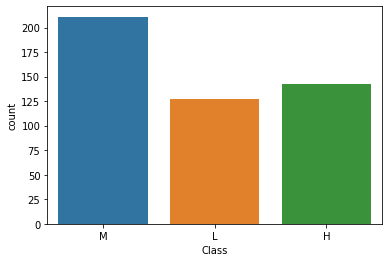

In [5]:
sns.countplot(df['Class'])

In [6]:
#Almost balanced.

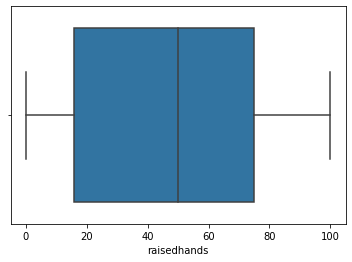

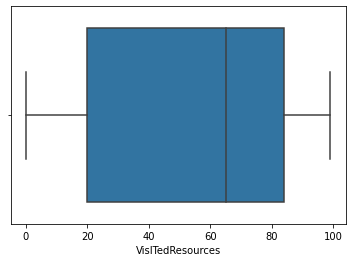

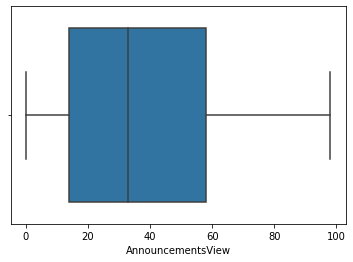

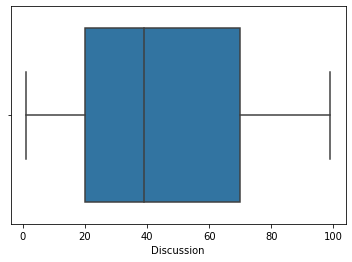

In [7]:
#Checking for outliers
df_num=df.select_dtypes(include=np.number)
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [8]:
#No outliers found in the data

In [9]:
#Checking for null values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [10]:
#No null values found in the dataset

<AxesSubplot: >

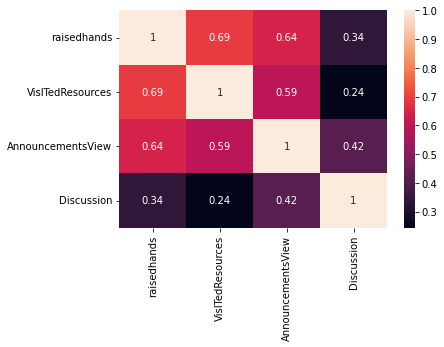

In [11]:
#Checking for correlations
sns.heatmap(df.corr(),annot=True)

In [12]:
#Visited resources and raiseHands are highly correlated
#Announcement and raisehands are highly correlated.

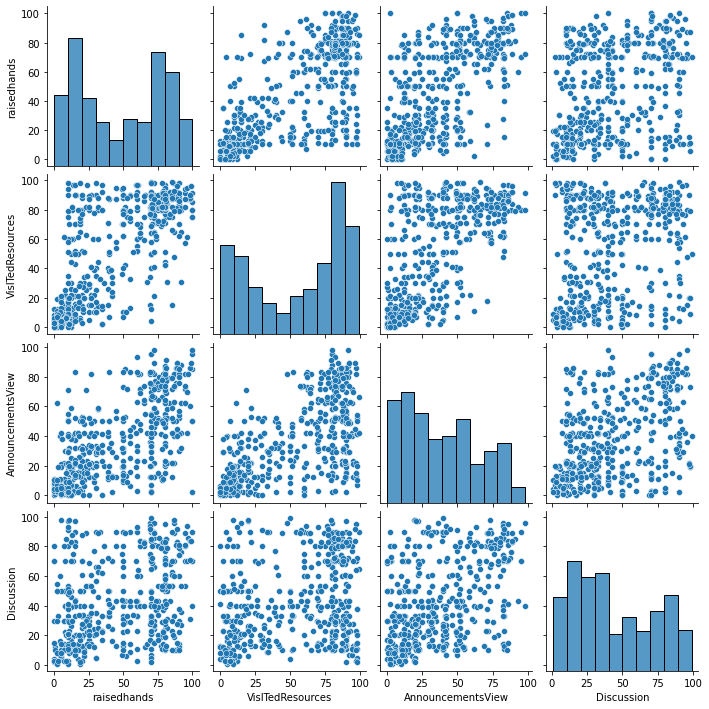

In [13]:
sns.pairplot(df)

In [14]:
#Preprocessing the data
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [15]:
x={'L':0,'M':1,'H':2}
df['Class']=df['Class'].map(x)

In [16]:
# Total Grade/mark 
# Low : 0
# Medium : 1
#High : 2

In [17]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [18]:
#Dropping the redundant columns
data=df.copy()

In [19]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [20]:
x=data[['gender','raisedhands','VisITedResources','AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays','Relation']]
y=data['Class']

In [21]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,1


In [22]:
x.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Relation
0,M,15,16,2,20,Yes,Good,Under-7,Father
1,M,20,20,3,25,Yes,Good,Under-7,Father
2,M,10,7,0,30,No,Bad,Above-7,Father
3,M,30,25,5,35,No,Bad,Above-7,Father
4,M,40,50,12,50,No,Bad,Above-7,Father


In [23]:
x['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [24]:
x['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [25]:
x['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [26]:
x['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [27]:
#Encoding the categorical columns
x['gender']=pd.get_dummies(x['gender'],drop_first=True)

In [28]:
x['gender'].value_counts()

1    305
0    175
Name: gender, dtype: int64

In [29]:
#male is 1
# female is 0

In [30]:
x['ParentAnsweringSurvey']=pd.get_dummies(x['ParentAnsweringSurvey'],drop_first=True)
x['ParentAnsweringSurvey'].value_counts()

1    270
0    210
Name: ParentAnsweringSurvey, dtype: int64

In [31]:
#yes-1
#no-0

In [32]:
x['ParentschoolSatisfaction']=pd.get_dummies(x['ParentschoolSatisfaction'],drop_first=True)
x['ParentschoolSatisfaction'].value_counts()

1    292
0    188
Name: ParentschoolSatisfaction, dtype: int64

In [33]:
#good=1
#bad=0

In [34]:
x['StudentAbsenceDays']=pd.get_dummies(x['StudentAbsenceDays'],drop_first=True)
x['StudentAbsenceDays'].value_counts()

1    289
0    191
Name: StudentAbsenceDays, dtype: int64

In [35]:
x['Relation']=pd.get_dummies(x['Relation'],drop_first=True)

In [36]:
#under-7=1
#above-7=0

In [37]:
x.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Relation
0,1,15,16,2,20,1,1,1,0
1,1,20,20,3,25,1,1,1,0
2,1,10,7,0,30,0,0,0,0
3,1,30,25,5,35,0,0,0,0
4,1,40,50,12,50,0,0,0,0


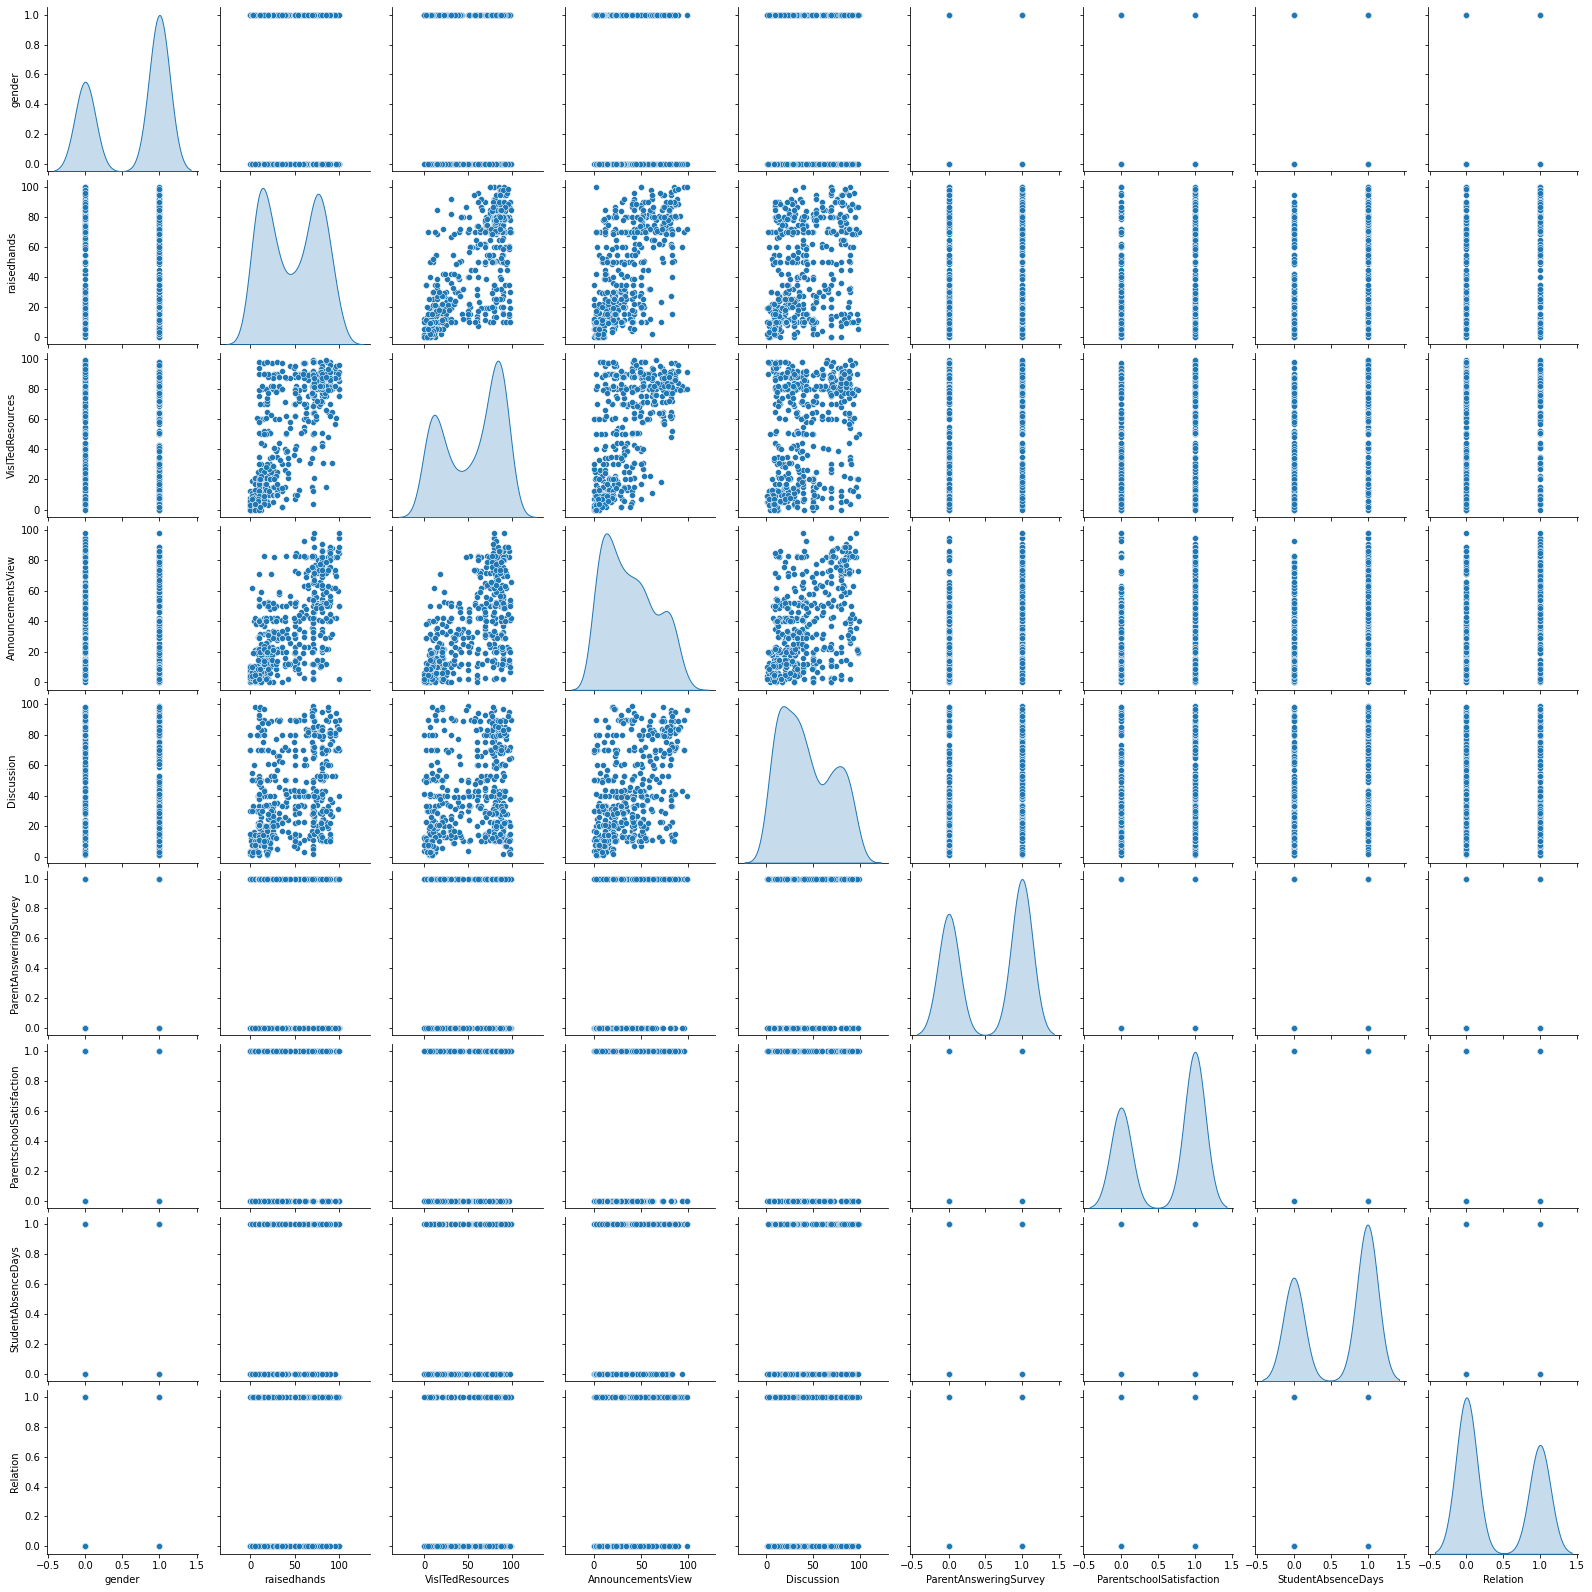

In [38]:
sns.pairplot(x,diag_kind='kde')

In [39]:
tobescaled=x[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]
s=StandardScaler()
ds=s.fit_transform(tobescaled)

In [40]:
tobescaled.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')

In [41]:
scaled=pd.DataFrame(ds,columns=tobescaled.columns)

In [42]:
scaled.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-1.033429,-1.174075,-1.351167,-0.843326
1,-0.870813,-1.053029,-1.313549,-0.662225
2,-1.196046,-1.446426,-1.426401,-0.481125
3,-0.545579,-0.901723,-1.238315,-0.300024
4,-0.220346,-0.145191,-0.974994,0.243279


In [43]:
x['raisedhands']=scaled['raisedhands']
x['VisITedResources']=scaled['VisITedResources']
x['AnnouncementsView']=scaled["AnnouncementsView"]
x['Discussion']=scaled['Discussion']

In [44]:
x.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Relation
0,1,-1.033429,-1.174075,-1.351167,-0.843326,1,1,1,0
1,1,-0.870813,-1.053029,-1.313549,-0.662225,1,1,1,0
2,1,-1.196046,-1.446426,-1.426401,-0.481125,0,0,0,0
3,1,-0.545579,-0.901723,-1.238315,-0.300024,0,0,0,0
4,1,-0.220346,-0.145191,-0.974994,0.243279,0,0,0,0


# MODEL BUILDING

In [45]:
#Starting with decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score,confusion_matrix

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [47]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dt_pred=dt.predict(xtest)
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        33
           1       0.62      0.64      0.63        56
           2       0.73      0.65      0.69        55

    accuracy                           0.69       144
   macro avg       0.70      0.71      0.70       144
weighted avg       0.69      0.69      0.69       144



In [48]:
#Accuracy is not upto the mark

In [49]:
md=[]
for i in range(1,50):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain,ytrain)
    dt_pred=dt.predict(xtest)
    acc=accuracy_score(dt_pred,ytest)
    md.append(acc)

In [50]:
md_series=pd.Series(md,index=range(1,50))

In [51]:
md_series.sort_values(ascending=False).head()

6     0.763889
5     0.750000
4     0.708333
7     0.708333
38    0.708333
dtype: float64

In [52]:
# max_depth = 48

In [77]:
dt=DecisionTreeClassifier(max_depth=6)

In [78]:
from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier()
criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,

In [79]:
grid=[{'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,3,5,7],'max_features':['auto','sqrt','log2','None']}]
gridsearch=GridSearchCV(estimator=dt,param_grid=grid,cv=5,scoring='accuracy')
gridsearch.fit(xtrain,ytrain)
gridsearch.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8}

In [80]:
grid=[{'min_samples_split':[6,8,10,12],'min_samples_leaf':[7,10,12,15],'max_features':['auto','sqrt','log2','None']}]
gridsearch=GridSearchCV(estimator=dt,param_grid=grid,cv=5,scoring='accuracy')
gridsearch.fit(xtrain,ytrain)
gridsearch.best_params_

{'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 6}

In [89]:
dt_2=DecisionTreeClassifier(max_depth=6,min_samples_leaf=10,max_features='auto',min_samples_split=6,class_weight='balanced')
dt_2.fit(xtrain,ytrain)
dt_2_pred=dt_2.predict(xtest)
print(classification_report(ytest,dt_2_pred))

              precision    recall  f1-score   support

           0       0.56      0.88      0.68        33
           1       0.68      0.50      0.58        56
           2       0.80      0.75      0.77        55

    accuracy                           0.68       144
   macro avg       0.68      0.71      0.68       144
weighted avg       0.70      0.68      0.68       144



In [90]:
grid2=[{'max_leaf_nodes':[10,15,20,30],'min_weight_fraction_leaf':[0.0,0.5,1.0,2.0,5.0]}]
gridsearch2=GridSearchCV(estimator=dt_2,param_grid=grid2,cv=5,scoring='accuracy')
gridsearch2.fit(xtrain,ytrain)
gridsearch2.best_params_

{'max_leaf_nodes': 30, 'min_weight_fraction_leaf': 0.0}

In [91]:
dt_3=DecisionTreeClassifier(max_depth=6,min_samples_leaf=10,max_features='auto',min_samples_split=6,class_weight='balanced',max_leaf_nodes=30)
dt_3.fit(xtrain,ytrain)
dt_3_pred=dt_3.predict(xtest)
print(classification_report(ytest,dt_3_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.81        33
           1       0.66      0.59      0.62        56
           2       0.78      0.71      0.74        55

    accuracy                           0.72       144
   macro avg       0.71      0.75      0.72       144
weighted avg       0.72      0.72      0.71       144



In [92]:
#Trying our random forest model
#base
rf=RandomForestClassifier(random_state=1)
rf.fit(xtrain,ytrain)
rf_pred=rf.predict(xtest)
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.64      0.70      0.67        56
           2       0.78      0.69      0.73        55

    accuracy                           0.73       144
   macro avg       0.75      0.75      0.74       144
weighted avg       0.73      0.73      0.73       144



In [93]:
#dt_2
rf_1=RandomForestClassifier(max_depth=6,max_features='auto',min_samples_leaf=10,min_samples_split=6,class_weight='balanced',max_leaf_nodes=30,random_state=1)
rf_1.fit(xtrain,ytrain)
rf_1_pred=rf_1.predict(xtest)
print(classification_report(ytest,rf_1_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.74      0.61      0.67        56
           2       0.78      0.82      0.80        55

    accuracy                           0.76       144
   macro avg       0.76      0.79      0.77       144
weighted avg       0.76      0.76      0.76       144



In [94]:
#Finding the best n_estimators for the random forest model.
error_rate=[]
for i in range(1,21):
    rf_2=RandomForestClassifier(n_estimators=i*5,max_depth=48,min_samples_leaf=12,min_samples_split=8,class_weight='balanced',max_leaf_nodes=30,random_state=1)
    rf_2.fit(xtrain,ytrain)
    rf_2_pred=rf_2.predict(xtest)
    error_rate.append(np.mean(rf_2_pred!=ytest))

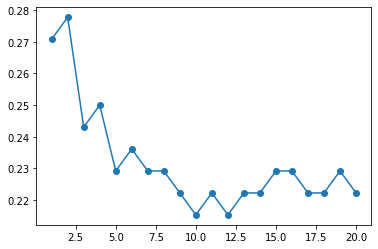

In [95]:
plt.plot(range(1,21),error_rate,marker='o')
plt.show()

In [96]:
rf_3=RandomForestClassifier(n_estimators=110,bootstrap='True',max_depth=6,min_samples_leaf=10,max_features='auto',min_samples_split=6,class_weight='balanced',max_leaf_nodes=30,random_state=1)
rf_3.fit(xtrain,ytrain)
rf_3_pred=rf_3.predict(xtest)
print(classification_report(ytest,rf_3_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.75      0.59      0.66        56
           2       0.77      0.84      0.80        55

    accuracy                           0.76       144
   macro avg       0.76      0.79      0.77       144
weighted avg       0.76      0.76      0.76       144



In [97]:
print(confusion_matrix(ytest,rf_3_pred))

[[31  2  0]
 [ 9 33 14]
 [ 0  9 46]]


In [98]:
random1=RandomForestClassifier(n_estimators=70,bootstrap='True',max_features='auto',random_state=1)
grid3=[{'max_depth':[10,20,40,50]}]
gridsearch3=GridSearchCV(estimator=random1,param_grid=grid3,cv=5)
gridsearch3.fit(xtrain,ytrain)
gridsearch3.best_params_

{'max_depth': 20}

In [99]:
grid3=[{'max_depth':[4,6,8,10,12],'min_samples_leaf':[2,4,5,7,10,12],'min_samples_split':[2,4,6,8]}]
gridsearch3=GridSearchCV(estimator=random1,param_grid=grid3,cv=5)
gridsearch3.fit(xtrain,ytrain)
gridsearch3.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [100]:
rf_4=RandomForestClassifier(n_estimators=70,bootstrap='True',max_depth=6,min_samples_leaf=2,max_features='auto',min_samples_split=8,class_weight='balanced',random_state=1)
rf_4.fit(xtrain,ytrain)
rf_4_pred=rf_4.predict(xtest)
print(classification_report(ytest,rf_4_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.71      0.64      0.67        56
           2       0.80      0.82      0.81        55

    accuracy                           0.76       144
   macro avg       0.76      0.77      0.76       144
weighted avg       0.75      0.76      0.75       144



In [101]:
#Adaboost classifier
ada1=AdaBoostClassifier(base_estimator=rf_4)
ada1.fit(xtrain,ytrain)
ada_1_pred=ada1.predict(xtest)
print(classification_report(ytest,ada_1_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.60      0.75      0.67        56
           2       0.79      0.60      0.68        55

    accuracy                           0.71       144
   macro avg       0.74      0.72      0.73       144
weighted avg       0.73      0.71      0.71       144



In [70]:
acc=[]
for i in range(1,21):
    ada1=AdaBoostClassifier(n_estimators=i*10,base_estimator=rf_4)
    ada1.fit(xtrain,ytrain)
    ada1_pred=ada1.predict(xtest)
    acc.append(np.mean(ada1_pred!=ytest))

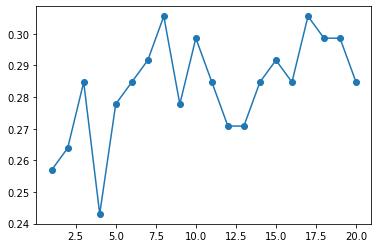

In [71]:
plt.plot(range(1,21),acc,marker='o')
plt.show()

In [72]:
ada2=AdaBoostClassifier(n_estimators=80,base_estimator=rf_4)
ada2.fit(xtrain,ytrain)
ada_2_pred=ada2.predict(xtest)
print(classification_report(ytest,ada_2_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.62      0.80      0.70        56
           2       0.82      0.60      0.69        55

    accuracy                           0.74       144
   macro avg       0.78      0.75      0.75       144
weighted avg       0.76      0.74      0.74       144



In [102]:
x=data[['gender','raisedhands','VisITedResources','AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays','Relation']]
x.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Relation
0,M,15,16,2,20,Yes,Good,Under-7,Father
1,M,20,20,3,25,Yes,Good,Under-7,Father
2,M,10,7,0,30,No,Bad,Above-7,Father
3,M,30,25,5,35,No,Bad,Above-7,Father
4,M,40,50,12,50,No,Bad,Above-7,Father


In [103]:
x['gender']=pd.get_dummies(x['gender'],drop_first=True)
x['ParentAnsweringSurvey']=pd.get_dummies(x['ParentAnsweringSurvey'],drop_first=True)
x['ParentschoolSatisfaction']=pd.get_dummies(x['ParentschoolSatisfaction'],drop_first=True)
x['StudentAbsenceDays']=pd.get_dummies(x['StudentAbsenceDays'],drop_first=True)
x.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Relation
0,1,15,16,2,20,1,1,1,Father
1,1,20,20,3,25,1,1,1,Father
2,1,10,7,0,30,0,0,0,Father
3,1,30,25,5,35,0,0,0,Father
4,1,40,50,12,50,0,0,0,Father
